# Homework 02

This Jupyter notebook file is a template that we provide for the homework.
You _must_ use this template and follow the instructions.
We require you to store specific intermediate results into _"submission variables"_ to unify the submission.
These values are printed at the _end_ of the jupyter notebook and will be (partially) used to grade your assignment.
Please ensure that these variables have the correct values and aren't overwritten by the following code cells.

In [4]:
# used for submission variables
from copy import deepcopy

In [5]:
# importing libraries
# you can import any that are installed in Docker/Paperspace environment
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

## Manually applying filters

In the theoretical lecture, you have seen a way to visualize and _manually_ calculate the convolution results.
Please apply this _manual_ convolution method to the following input array.
For this task, you can only use basic numpy operators (`+ - / @`) and for loops.

Apply the manual convolution method using:
- 0-padding
- Reflection
    - `a b c d` as input leads to the following reflections on the left and right-hand sides:
        - `d c b a | a b c d | d c b a`

In [6]:
inp_arr = np.array(
    [
        [1, 0, 1],
        [0, 1, 0],
        [0, 0, 0],
    ]
)

kernel = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
)

In [7]:
# Add your code
input_size = inp_arr.shape[0]
kernel_size = kernel.shape[0]

padding_size = kernel_size - 1
total_size = input_size + 2 * padding_size

output_arr_0_pad = np.zeros((total_size, total_size))
output_arr_reflect = np.zeros((total_size, total_size))

for row in range(input_size):
    for column in range(input_size):
        output_arr_0_pad[row + padding_size][column + padding_size] = inp_arr[row][column]
        output_arr_reflect[row + padding_size][column + padding_size] = inp_arr[row][column]

for row in range(total_size):
    for column in range(total_size):

        # skip coordinate pairs inside the content
        inner_indexes = list(range(padding_size, input_size + padding_size))
        if row in inner_indexes and column in inner_indexes:
            continue

        # calculate reflection indexes for row and column
        coordinate_values = [row, column]
        new_coordinates = []
        for index in coordinate_values:

            start_edge_index = padding_size  # first index inside content
            end_edge_index = input_size + padding_size - 1  # last index inside content

            if index < start_edge_index:
                distance_to_edge = (start_edge_index - 1) - index
                index = start_edge_index + distance_to_edge

            elif index >= input_size + padding_size:
                distance_to_edge = index - (end_edge_index + 1)
                index = end_edge_index - distance_to_edge

            else:
                pass  # this coordinate doesnt get mirrored

            # now subtract the padding from index and save it back
            index = index - padding_size
            new_coordinates.append(index)


        # now set the
        new_row, new_col = new_coordinates[0], new_coordinates[1]
        print(f"{row},{column} -> {new_row},{new_col}")
        output_arr_reflect[row][column] = inp_arr[new_row][new_col]

output_arr_reflect

0,0 -> 1,1
0,1 -> 1,0
0,2 -> 1,0
0,3 -> 1,1
0,4 -> 1,2
0,5 -> 1,2
0,6 -> 1,1
1,0 -> 0,1
1,1 -> 0,0
1,2 -> 0,0
1,3 -> 0,1
1,4 -> 0,2
1,5 -> 0,2
1,6 -> 0,1
2,0 -> 0,1
2,1 -> 0,0
2,5 -> 0,2
2,6 -> 0,1
3,0 -> 1,1
3,1 -> 1,0
3,5 -> 1,2
3,6 -> 1,1
4,0 -> 2,1
4,1 -> 2,0
4,5 -> 2,2
4,6 -> 2,1
5,0 -> 2,1
5,1 -> 2,0
5,2 -> 2,0
5,3 -> 2,1
5,4 -> 2,2
5,5 -> 2,2
5,6 -> 2,1
6,0 -> 1,1
6,1 -> 1,0
6,2 -> 1,0
6,3 -> 1,1
6,4 -> 1,2
6,5 -> 1,2
6,6 -> 1,1


array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1.]])

In [8]:
# DO NOT EDIT
submission_output_arr_0_pad = deepcopy(output_arr_0_pad)
submission_output_reflect = deepcopy(output_arr_reflect)
###

Visualize the outputs of the convolution operation and plot the results _next_ to each other in a single row.

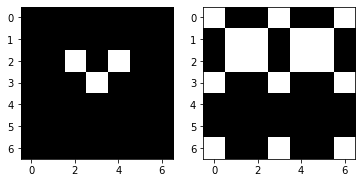

In [12]:
# Add code to visualize the results next to each other
# Create two subplots
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].imshow(output_arr_0_pad, cmap="gray")
ax[1].imshow(output_arr_reflect, cmap="gray")



## Applying filters to satellite data

After manually applying the convolution operation to the input, you can now use the functions provided by `scipy` for the remaining tasks.

1. Download the image from the following link:
    - https://tubcloud.tu-berlin.de/s/mPLKMiHdSbbnNcH/download/noisy_river.npz
    - Note: The image data has already been converted to the [0, 1] range, so there is no need to apply any _preprocessing/normalization_ to the data!
1. Extract and visualize the channel that is named `blue`
1. Apply filters that are designed for _denoising_ the input image
    - Select a single filter for generating the denoised output
    - Explain why you have selected the filter and why you have chosen the specific kernel size
    - Visualize the denoised image
2. Apply filters that are not designed for denoising with varying sizes and padding strategies to the _denoised_ image
    - What is the effect of the padding strategy on the output?
    - What do you notice when changing the padding strategy?


Target file already exists!
Will skip download. To force download set `force=True`


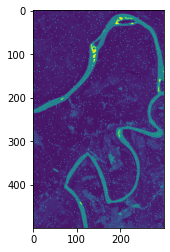

In [20]:
# Download the noisy image from within the notebook
from simple_downloader import download
TUB_URL = "https://tubcloud.tu-berlin.de/s/mPLKMiHdSbbnNcH/download/noisy_river.npz"
output_file = download(TUB_URL, "./data/ha2-data")
npzfiles = np.load(output_file)


# And visualize the blue band
noisy_blue_band = npzfiles['blue']

plt.imshow(noisy_blue_band)

In [8]:
# DO NOT EDIT
submission_noisy_img = deepcopy(noisy_blue_band)
###

(500, 300)


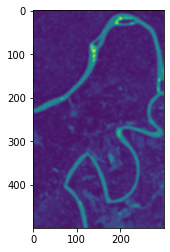

In [28]:
# Denoise the image with a _single_ filter and visualize the result
print(noisy_blue_band.shape)
smaller_img_size = 300

kernel_size = int(smaller_img_size / 50)
avg_kernel = np.ones((kernel_size, kernel_size))
denoised_img = ndimage.convolve(noisy_blue_band, avg_kernel) / avg_kernel.sum()

plt.imshow(denoised_img, vmin=0, vmax=1)

Add a short discussion about _why_ you selected the filter and _why_ the chosen kernel size was selected, not a different one.

# Discussion

I chose an averaging filter as it seems like a straightforward way to reduce noise and a kernel size of 2% of the smaller image dimension as it seemed to result in a denoising effect that does not loose too much information about the main features.

In [29]:
# DO NOT EDIT
submission_denoised_img = deepcopy(denoised_img)
###

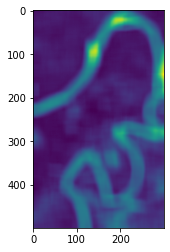

In [30]:
# apply different filter operations with various sizes and
# padding strategies to the denoised image
# try to visualize a couple of outputs that support your
# arguments in the padding-strategy discussion!

# bigger kernel size with averaging
kernel_size = int(smaller_img_size / 10)
avg_kernel = np.ones((kernel_size, kernel_size))
denoised_img = ndimage.convolve(noisy_blue_band, avg_kernel) / avg_kernel.sum()
plt.imshow(denoised_img)

# TODO: change padding strategy / size



Add a short discussion about the padding strategy here.

### Creating features

Create an output feature map that highlights the river edges.
- You can apply multiple filter operations after each other to generate the output feature map
- You can arbitrarily compose the intermediate results
    - For example, by adding feature maps of filter responses together
- The final feature map should be normalized to the range between 0 -- 1
- Your strategy _must_ include _custom_ kernels that were not presented in the theoretical lecture

Visually compare your output to the following image:

![](river_edges.png)

> If the image isn't displayed, make sure that the image file is located next to this notebook! Otherwise, manually inspect the provided image file: `river_edges.png`

What is more/less prominent in your image?
Try to provide an intuitive explanation for why your filter composition choice generates the given output.
Motivate your choices and clarify that you haven't applied _random_ kernels to the output!

In [12]:
# TODO: create complex filter output

river_border_features = ...

In [13]:
# DO NOT EDIT
submission_river_border_features = deepcopy(river_border_features)
###

## Submission

- Follow the instructions mentioned in this notebook
- You are _not_ allowed to install other libraries
    - The submitted jupyter notebook should be able to run as-is on Paperspace and/or the provided Docker image.
- Explain the steps that went into the decision making of the specific values
- Each homework must be done individually!
- The notebook should have been executed once before submitting it
    - The notebook should _not_ be _cleaned_ before submitting

Each student should submit the following materials to the ISIS system:
- One `zip` file containing the jupyter notebook named as: `IP4RS2022-HW2_<NAME_SURNAME>.zip`



### Submission variables

Please ensure that these variables are correct after you have restarted your notebook and executed all cells from top to bottom.
You are _not allowed_ to modify the following cells:

In [14]:
import rich

rich.print(f"{submission_output_arr_0_pad=}")
rich.print(f"{submission_output_reflect=}")
rich.print(f"{submission_noisy_img}")
rich.print(f"{submission_denoised_img=}")
rich.print(f"{submission_river_border_features}")

submission_output_arr_0_pad=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

submission_output_reflect=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Ellipsis

submission_denoised_img=Ellipsis

Ellipsis